<a href="https://colab.research.google.com/github/Tejaswini0303/Machine-Learning/blob/main/PBL_ML_Logistic_Regression_on_SONAR_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,accuracy_score)

In [ ]:
dataset=pd.read_csv("/content/Copy of sonar data.csv",header=None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
dataset.shape

(208, 61)

In [ ]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


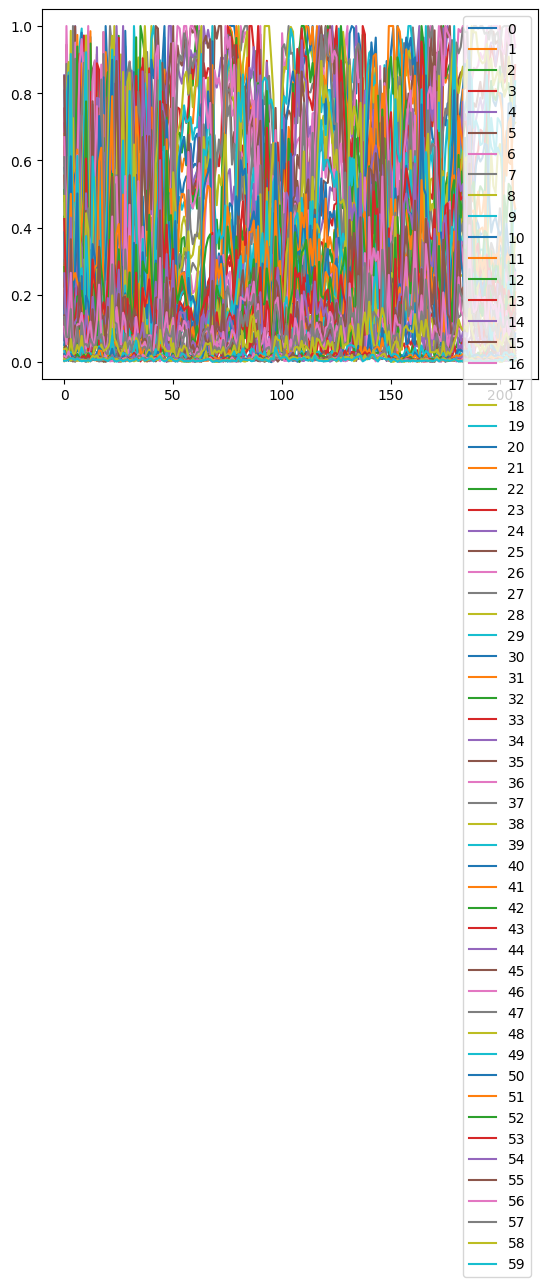

In [ ]:
dataset.plot()
plt.show()

In [ ]:
dataset[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [ ]:
dataset.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
x=dataset.drop(columns=60,axis=1)
y=dataset[60]

In [ ]:
print(x)
print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

training and test data
splitiing data



In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
#print(y_train.value_counts())
#print(y_test.value_counts())

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)
print(y_train.value_counts())
print(y_test.value_counts())

60
M    100
R     87
Name: count, dtype: int64
60
M    11
R    10
Name: count, dtype: int64


In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(208, 60) (187, 60) (21, 60)


model training

In [ ]:
x.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


<Axes: >

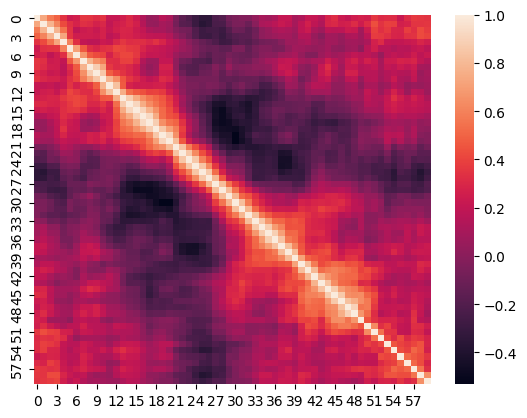

In [ ]:
sb.heatmap(x.corr())

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)


LogisticRegression()

accuracy on training data


In [ ]:
y_train_predict=model.predict(x_train)
train_accuracy=accuracy_score(y_train_predict,y_train)
print("Accuracy on training data:",train_accuracy)

Accuracy on training data: 0.8342245989304813


In [ ]:
y_test_predict=model.predict(x_test)
test_accuracy=accuracy_score(y_test_predict,y_test)
print("Accuracy on training data:",test_accuracy)

Accuracy on training data: 0.7619047619047619


predictive model


reshaping the numpy array for predicting for one instance

```
# This is formatted as code
```



In [ ]:
input=(0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
#changing input data into numpy array
input_as_numpy=np.asarray(input)
input_data=input_as_numpy.reshape(1,-1)
prediction=model.predict(input_data)
print(prediction)
if(prediction[0]=='R'):
  print("The object is a Rock")
else:
  print("The object is a Mine")


['R']
The object is a Rock
